In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)


In [7]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [9]:
gbm_model

GradientBoostingRegressor()

In [11]:
y_pred=gbm_model.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.178336648744

In [ ]:
#model tuning


In [17]:
# loss fonksiyonlarındaki quantile, huber, lad dayanıklı fonksiyonlardır. Yani aykırı artıklara karşı dayanıklı olan fonksiyonlardır. Örneğin gerçek değer 1000, tahmin edilen değer 9000, arada 8000 fark var. Bu artık büyük miktarda sayılabilecek bir artıktır. Bunlara karşı duyarlı olmak ifade edilmektedir. 

# Modelin eğitim süresini kısaltmak için parametreleri azaltabilirsiniz. Bu haliyle yaklaşık 30 dakika sürmektedir. 
gbm_params = {"learning_rate" : [0.001, 0.1, 0.01, 0.5], "max_depth" : [3, 5, 8, 10], "n_estimators": [100, 200, 500, 1000], "subsample" :[1, 0.5, 0.8],
"loss" : ["ls", "lad", "quantile"]}

In [19]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [23]:
gbm_model_cv = GridSearchCV(gbm_model, gbm_params,
                            cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3840 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
999 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site

In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,
                                   loss="lad",
                                   max_depth=3,
                                   n_estimators=200,
                                   subsample=1).fit(X_train,y_train)

In [ ]:
y_pred=gbm_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.178336648744

In [ ]:
#degisken önem düzeyi


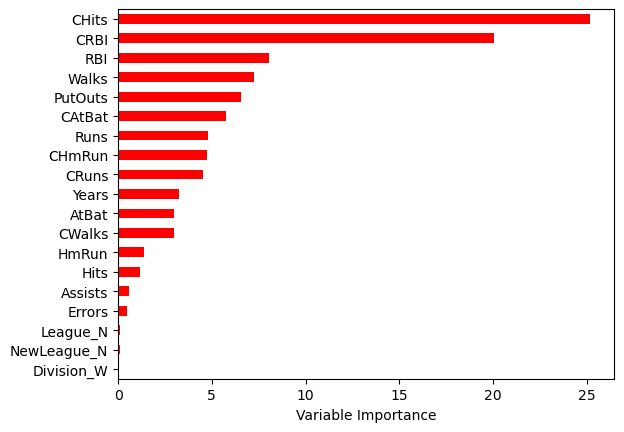

In [33]:
Importance = pd.DataFrame({'Importance':gbm_model.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh',color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None